In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import markdown as md
from pandas import DataFrame
import plotly.express as px 

In [2]:
## import sklearn related libraries

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, auc, log_loss

from mlxtend.plotting import plot_confusion_matrix


In [3]:
## as this is a text dataset, import libraries to apply Natural Language Processing(NLP) model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.util import ngrams

In [4]:
## import tensorflow libraries
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

In [67]:
## load the dataset
fake_news= pd.read_csv('news_articles.csv')
fake_news.head(3)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0


In [187]:
## what is our data?
## trying to predict the real news from the fake ones

## Type: refers to 8 different types of info; bias, conspiracy, fake, bs, satire, hate, junksci, state 
## Label: refers to news being Real or Fake

In [68]:
## check the data types, missing values
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2097 non-null   object 
 2   title                    2097 non-null   object 
 3   text                     2051 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2093 non-null   object 
 10  text_without_stopwords   2045 non-null   object 
 11  hasImage                 2094 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.7+ KB


In [69]:
## drop all the missing values in the dataset
fake_news_data= fake_news.dropna()

In [70]:
## check the data again - all 2045 entries and no missing data
fake_news_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2046
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2044 non-null   object 
 1   published                2044 non-null   object 
 2   title                    2044 non-null   object 
 3   text                     2044 non-null   object 
 4   language                 2044 non-null   object 
 5   site_url                 2044 non-null   object 
 6   main_img_url             2044 non-null   object 
 7   type                     2044 non-null   object 
 8   label                    2044 non-null   object 
 9   title_without_stopwords  2044 non-null   object 
 10  text_without_stopwords   2044 non-null   object 
 11  hasImage                 2044 non-null   float64
dtypes: float64(1), object(11)
memory usage: 207.6+ KB


In [71]:
## this is to use the data later for modelling
## sometimes through the preprocessing, I may need to check the original dataset, therefore I set one just in case. 
fake_news_model_data= fake_news_data

In [72]:
fake_news_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2046
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2044 non-null   object 
 1   published                2044 non-null   object 
 2   title                    2044 non-null   object 
 3   text                     2044 non-null   object 
 4   language                 2044 non-null   object 
 5   site_url                 2044 non-null   object 
 6   main_img_url             2044 non-null   object 
 7   type                     2044 non-null   object 
 8   label                    2044 non-null   object 
 9   title_without_stopwords  2044 non-null   object 
 10  text_without_stopwords   2044 non-null   object 
 11  hasImage                 2044 non-null   float64
dtypes: float64(1), object(11)
memory usage: 207.6+ KB


In [12]:
fake_news_data.describe()

,hasImage
count,2044.000000
mean,0.772505
std,0.419317
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
## split date and time to see if there is any trend
timesplit = fake_news_data['published'].str.split('T', 1, expand=True)
fake_news_data['Time']=timesplit[1]
fake_news_data['Date']=timesplit[0]

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/1495755006.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  timesplit = fake_news_data['published'].str.split('T', 1, expand=True)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/1495755006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data['Time']=timesplit[1]
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/1495755006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [14]:
## split the month and day
datesplit = fake_news_data['Date'].str.split('-',n=-1, expand=True)
fake_news_data['Year']=datesplit[0]
fake_news_data['Month']=datesplit[1]
fake_news_data['Day']=datesplit[2]

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/2478122128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data['Year']=datesplit[0]
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/2478122128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data['Month']=datesplit[1]
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/2478122128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [15]:
## replace invalid values with NaN for Month and Day
fake_news_data['Month']= pd.to_numeric(fake_news_data['Month'], errors='coerce')
fake_news_data['Day']= pd.to_numeric(fake_news_data['Day'], errors='coerce')

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/3155617738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data['Month']= pd.to_numeric(fake_news_data['Month'], errors='coerce')
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/3155617738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data['Day']= pd.to_numeric(fake_news_data['Day'], errors='coerce')


In [16]:
## then convert these columns to float
## after this, my plot for months and days should work properly
fake_news_data['Month']= fake_news_data['Month'].astype(float)
fake_news_data['Day']= fake_news_data['Day'].astype(float)

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/113762075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data['Month']= fake_news_data['Month'].astype(float)
/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/113762075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data['Day']= fake_news_data['Day'].astype(float)


In [17]:
## time, date, year, month and day columns are added to the dataset seperately
fake_news_data.head(3)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,Time,Date,Year,Month,Day
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,21:41:00.000+03:00,2016-10-26,2016,10.0,26.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,08:47:11.259+03:00,2016-10-29,2016,10.0,29.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,01:41:49.479+02:00,2016-10-31,2016,10.0,31.0


In [18]:
## check the 'label'
fake_news_data['label'].unique()


array(['Real', 'Fake'], dtype=object)

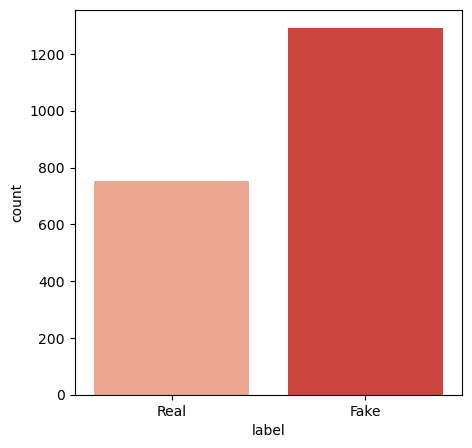

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x='label',data=fake_news_data,palette='Reds');

In [20]:
## check the 'type'
## if I don't add 'unique()' to the end of the code, it will list all the lines

fake_news_data['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [21]:
fake_news_data['type'].value_counts()

bs            598
conspiracy    430
bias          389
hate          243
satire        146
state         121
junksci       102
fake           15
Name: type, dtype: int64

Text(0.5, 1.0, 'No of Types of News')

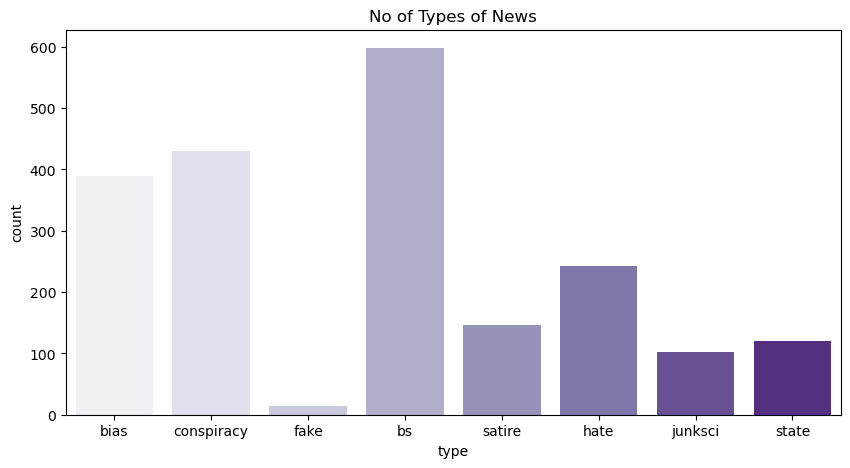

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='type',data=fake_news_data, palette='Purples')
plt.title('No of Types of News')

Text(0.5, 1.0, 'No of Types of News')

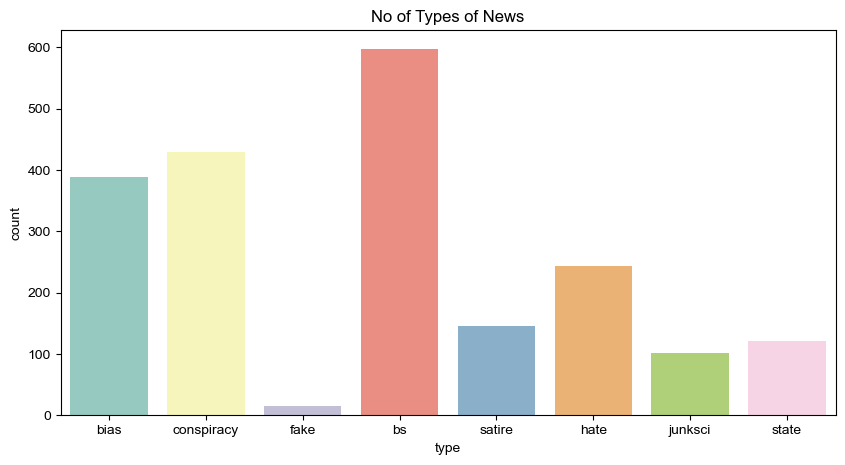

In [23]:
## try a different plot with different colors
plt.figure(figsize=(10,5))
sns.countplot(x='type',data=fake_news_data, palette='Set3') 
sns.set_theme(style='darkgrid')

plt.title('No of Types of News')


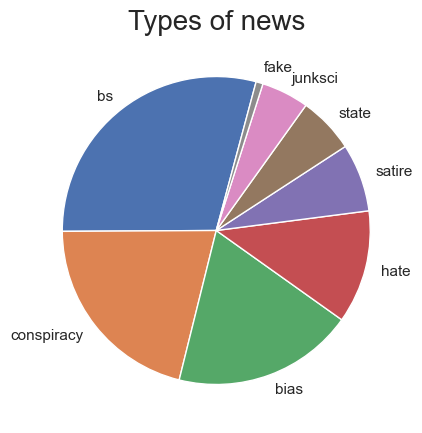

In [24]:
## try a pie chart - will it work?

fake_news_data['type'].value_counts().plot.pie(figsize = (5,5), startangle = 75)
plt.title('Types of news', fontsize = 20)
plt.axis('off')
plt.show()

In [206]:
## top 4 problem types are; bs, conspiracy, bias and hate - bullshit(bs) being the biggest, close to 600 times

In [207]:
## if I convert type to numerical value, I can plot both type and label together

## type_new= {'bias':0, 'conspiracy':1, 'fake':2, 'bs':3, 'satire':4, 'hate':5, 'junksci':6, 'state':7}
## fake_news_data= [type_new[item] for item in fake_news_data.type]


In [25]:
fake_news_data['label'].value_counts()

Fake    1291
Real     753
Name: label, dtype: int64

In [26]:
## split the label, if Fake= 0, if Real=1 
fake_news_data['label']=np.where(fake_news_data['label']== 'Fake', 0, 1)

/var/folders/gh/tx1mhxb93m56yvmy9qknq1wr0000gn/T/ipykernel_7209/3026500518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_data['label']=np.where(fake_news_data['label']== 'Fake', 0, 1)


In [28]:
fake_news_data.head(3)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,Time,Date,Year,Month,Day
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,21:41:00.000+03:00,2016-10-26,2016,10.0,26.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,08:47:11.259+03:00,2016-10-29,2016,10.0,29.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,01:41:49.479+02:00,2016-10-31,2016,10.0,31.0


In [29]:
fake_news_data['language'].value_counts()

english    1966
german       72
ignore        3
french        2
spanish       1
Name: language, dtype: int64

Text(0.5, 1.0, 'No of Languages in the News')

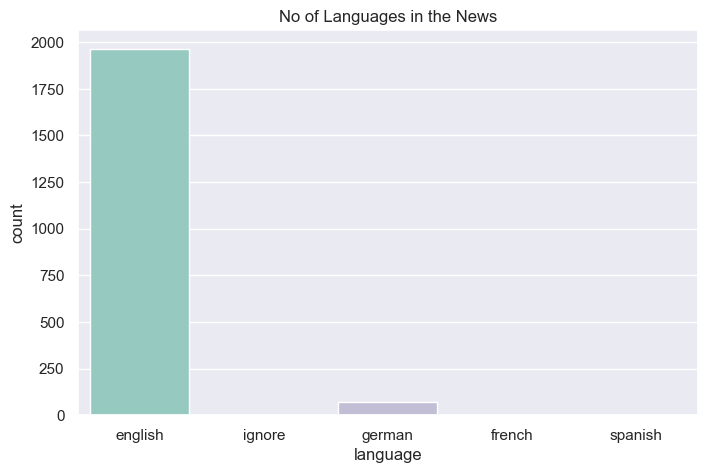

In [30]:
## what is 'ignore' in language list?
## there are only 3 rows, so should I drop them or not? don't think so

plt.figure(figsize=(8,5))
sns.countplot(x='language',data=fake_news_data, palette='Set3')
sns.set_theme(style='darkgrid')
plt.title('No of Languages in the News')

In [213]:
## English being the dominant language - maybe drop all the rest

Text(0.5, 1.0, 'Months for published News')

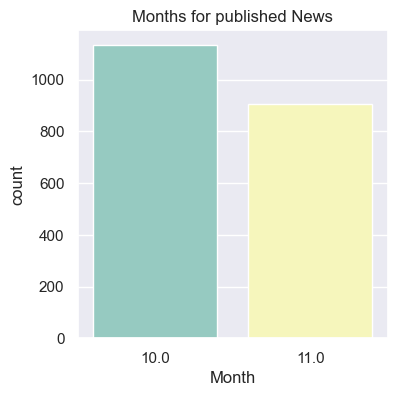

In [31]:
## plot to see which months of published news - after converting to float, it works as it should be
plt.figure(figsize=(4,4))
sns.countplot(x='Month',data=fake_news_data, palette='Set3') 
sns.set_theme(style='darkgrid')

plt.title('Months for published News')

Text(0.5, 1.0, 'Count of News with/without Images')

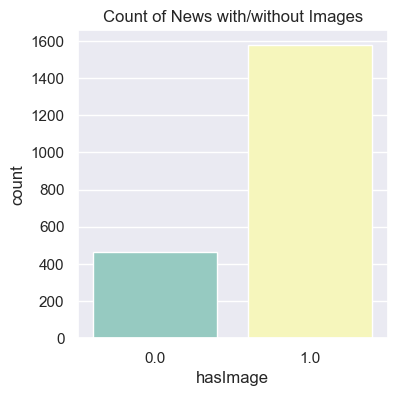

In [32]:
## check the hasImage - how many has an image attached to it?
plt.figure(figsize=(4,4))
sns.countplot(x='hasImage',data=fake_news_data, palette='Set3') 
sns.set_theme(style='darkgrid')

plt.title('Count of News with/without Images')

Text(0.5, 1.0, 'Top 5 Site URLs with count of news')

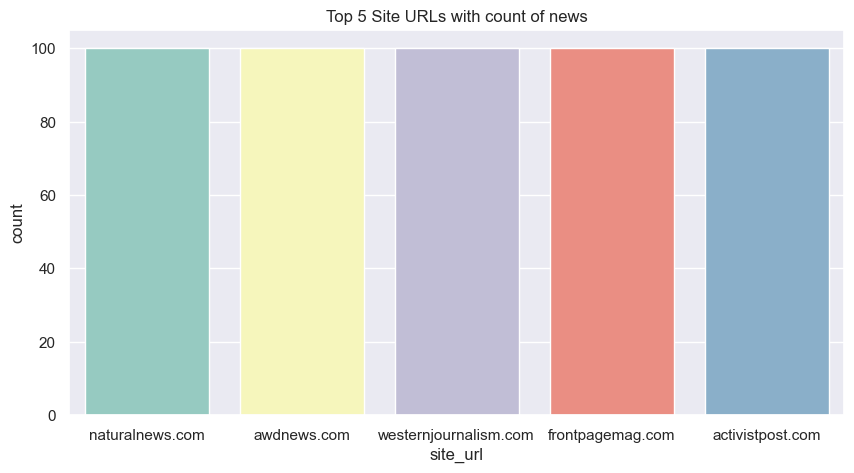

In [33]:
## check the top 5 sites for site_url
plt.figure(figsize=(10,5))
sns.countplot(x='site_url',data=fake_news_data, palette='Set3', order= fake_news_data.site_url.value_counts().iloc[:5].index) 
sns.set_theme(style='darkgrid')
plt.title('Top 5 Site URLs with count of news')

Text(0.5, 1.0, 'URLs with count of news')

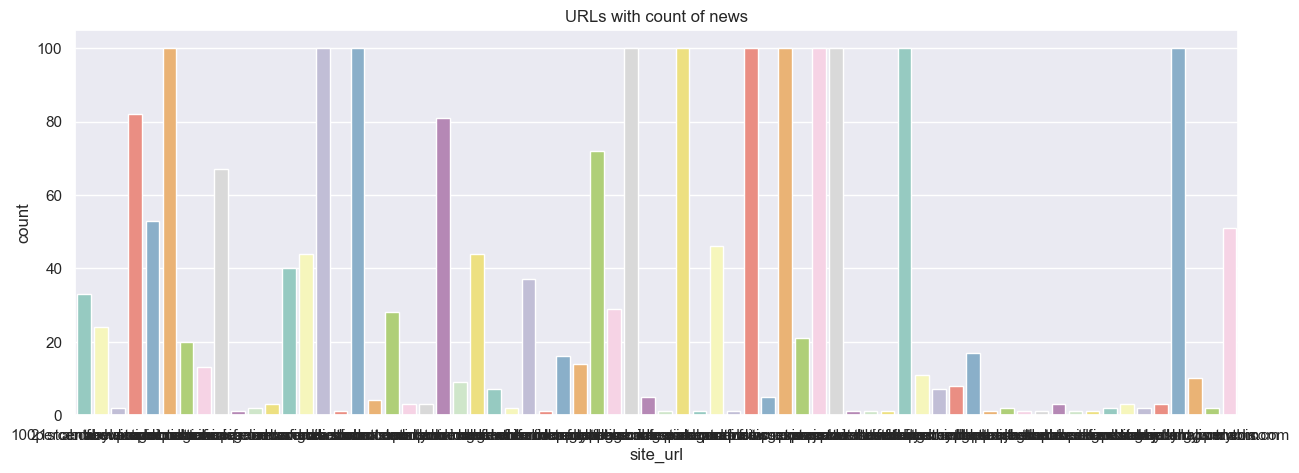

In [34]:
## what happens if I try to plot all the websites?
## cannot distinguish any sites on this graph so top10 works better

plt.figure(figsize=(15,5))
sns.countplot(x='site_url',data=fake_news_data,palette='Set3')
sns.set_theme(style='darkgrid')
plt.title('URLs with count of news')

Text(0.5, 1.0, 'Top 10 Authors with count of news')

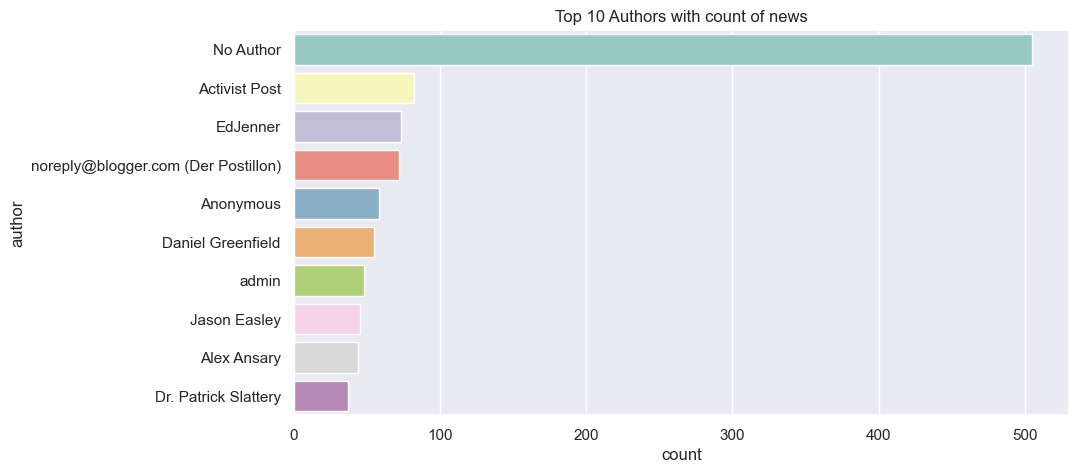

In [35]:
## check the top 10 authors for the news

plt.figure(figsize=(10,5))
sns.countplot(y='author',data=fake_news_data, palette='Set3', order= fake_news_data.author.value_counts().iloc[:10].index) 
sns.set_theme(style='darkgrid')
plt.title('Top 10 Authors with count of news')


In [ ]:
## the main heading that I is 'text_without_stopwords' as this will help me identify the top words for predicting the which news is fake and which news is real

In [ ]:
## now I'll use n-gram 
## will import this from nltk library to find the most common words that are used in this news dataset
## what is n-gram? 
## n-gram= it's a contiguous squence of n items from a given sample of text or speech in computational linguistics. The items can be phonemes, syllables, letters, words. The n-grams are collected from a text or speech corpus.
## n, bigram, trigram to identify top words frequently used in the news

In [36]:
## so it should give three different sets, one word, two words together and three words together
## corpus= large and structured set of machine readable texts that have been produced in a natural communicative setting

## set the function as follows;

def top_words_n(corpus, n=None):
    vec= CountVectorizer().fit(corpus)
    word_bags= vec.transform(corpus)
    word_sum= word_bags.sum(axis=0)
    frequently_used_words= [(word, word_sum[0, idx])for word, idx in vec.vocabulary_.items()]
    frequently_used_words= sorted(frequently_used_words, key= lambda x: x[1], reverse=True)
    return frequently_used_words[:n] 

def top_words_bigram(corpus, n=None):
    vec= CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    word_bags= vec.transform(corpus)
    word_sum= word_bags.sum(axis=0)
    frequently_used_words= [(word, word_sum[0, idx])for word, idx in vec.vocabulary_.items()]
    frequently_used_words= sorted(frequently_used_words, key= lambda x: x[1], reverse=True)
    return frequently_used_words[:n] 
    
def top_words_trigram(corpus, n=None):
    vec= CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    word_bags= vec.transform(corpus)
    word_sum= word_bags.sum(axis=0)
    frequently_used_words= [(word, word_sum[0, idx])for word, idx in vec.vocabulary_.items()]
    frequently_used_words= sorted(frequently_used_words, key= lambda x: x[1], reverse=True)
    return frequently_used_words[:n] 


In [37]:
## from the set function, print the top 20 commonly used words for top_words_n

commonly_used_words= top_words_n(fake_news_data['text_without_stopwords'], 20)
fake_news_data1= pd.DataFrame(commonly_used_words, columns=['word', 'count'])
top_20_unigrams=fake_news_data1.groupby('word').sum()['count'].sort_values(ascending=False)
top_20_unigrams

##.iplot(kind='bar', yTitle='Count', linecolor='green') - iplot doesn't work- why?


word
trump        3380
clinton      3052
one          2368
us           2349
said         2322
people       2267
would        2212
hillary      2047
also         1727
like         1671
election     1453
new          1443
time         1380
even         1361
state        1239
president    1191
could        1147
get          1146
campaign     1135
many         1090
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 unigrams used in the news')

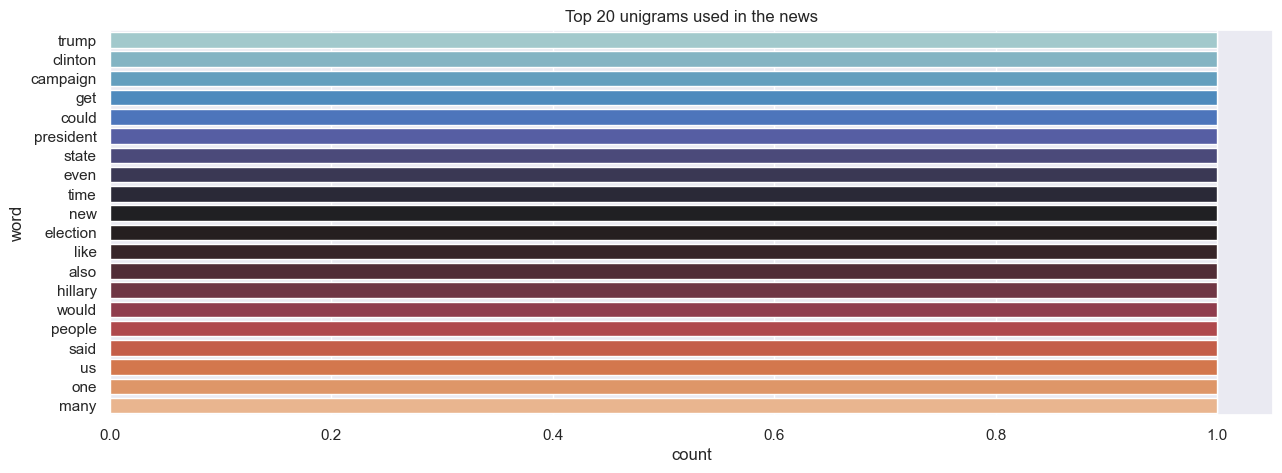

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(y='word',data=fake_news_data1, palette='icefire', order= fake_news_data1.word.value_counts().iloc[:20].index) 
sns.set_theme(style='darkgrid')
plt.xlim()
plt.ylim()
plt.title('Top 20 unigrams used in the news')

In [39]:
## from the set function, print the top 20 commonly used 2-words phrases from top_words_bigram

commonly_used_words= top_words_bigram(fake_news_data['text_without_stopwords'], 20)
fake_news_data2= pd.DataFrame(commonly_used_words, columns=['word', 'count'])
top_20_bigrams=fake_news_data2.groupby('word').sum()['count'].sort_values(ascending=False)
top_20_bigrams

word
hillary clinton          1073
donald trump              885
united states             499
new york                  335
white house               324
clinton campaign          248
hillary clintons          230
brain force               209
bill clinton              205
clinton foundation        185
secretary state           182
presidential election     149
fbi director              147
barack obama              142
mainstream media          139
alex jones                136
attorney general          132
election day              132
donald trumps             130
democratic party          129
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 bigrams used in the news')

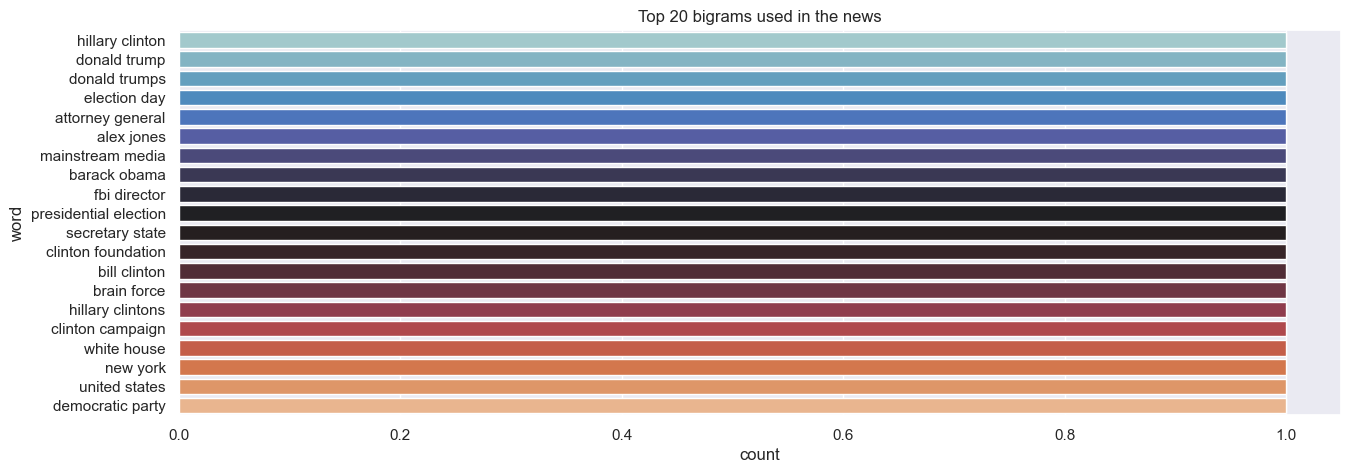

In [40]:
## plot the top 20 two-word most commonly used bigrams in the news

plt.figure(figsize=(15,5))
sns.countplot(y='word',data=fake_news_data2, palette='icefire', order= fake_news_data2.word.value_counts().iloc[:20].index) 
sns.set_theme(style='darkgrid')
plt.xlim()
plt.ylim()
plt.title('Top 20 bigrams used in the news')

In [41]:
## from the set function, print the top 20 commonly used 3-words phrases from top_words_trigram

commonly_used_words= top_words_trigram(fake_news_data['text_without_stopwords'], 20)
fake_news_data3= pd.DataFrame(commonly_used_words, columns=['word', 'count'])
top_20_trigrams=fake_news_data3.groupby('word').sum()['count'].sort_values(ascending=False)
top_20_trigrams

word
activation infowars life                                                                                                                                                                                                                                                                                                                                                                114
infowars life httpwwwinfowarscomwpcontentuploadsbrainforceejpg                                                                                                                                                                                                                                                                                                                          114
supercharge state mind                                                                                                                                                                                                                     

In [ ]:
## trigrams does not work efficiently as some words were written without any spaces so the code picks them up as one full word, so no use.

## unigram and bigram words are very clear and precise

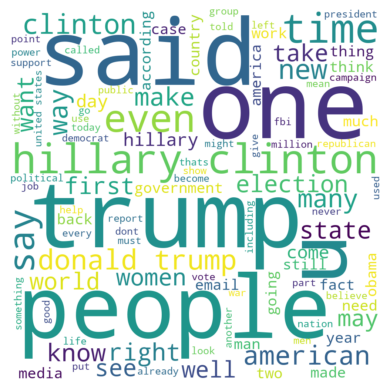

In [42]:
## let me use WordCloud - very excited to use this :)

wc_news= WordCloud(background_color='white', max_words=100, max_font_size=256, random_state=32, width=1000, height=1000)
wc_news.generate(' '.join(fake_news_data['text_without_stopwords']))
plt.imshow(wc_news, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## the selected words in the WorldCloud seem reasonable, very similar to unigram list that I have printed above

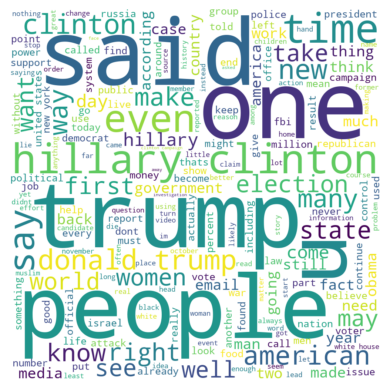

In [43]:
## what happens if I use 200 words for WorldCloud

wc_news1= WordCloud(background_color='white', max_words=200, max_font_size=256, random_state=32, width=1000, height=1000)
wc_news1.generate(' '.join(fake_news_data['text_without_stopwords']))
plt.imshow(wc_news1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## another way of listing the top most commonly used words in the news is clusters
## create two clusters - one cluster with fake data and another cluster with real data 
## leave this to later, if time allows practice

In [ ]:
############
#####################    PREPARATION BEFORE MODELLING  #################

In [73]:
fake_news_model_data.head(5)


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [74]:
fake_news_model_data=fake_news_model_data.dropna()

In [75]:
fake_news_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2046
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2044 non-null   object 
 1   published                2044 non-null   object 
 2   title                    2044 non-null   object 
 3   text                     2044 non-null   object 
 4   language                 2044 non-null   object 
 5   site_url                 2044 non-null   object 
 6   main_img_url             2044 non-null   object 
 7   type                     2044 non-null   object 
 8   label                    2044 non-null   object 
 9   title_without_stopwords  2044 non-null   object 
 10  text_without_stopwords   2044 non-null   object 
 11  hasImage                 2044 non-null   float64
dtypes: float64(1), object(11)
memory usage: 207.6+ KB


In [76]:
## will import stem snowball from nltk library
from nltk.stem.snowball import SnowballStemmer

In [77]:
stem_for_model= SnowballStemmer('english')

In [78]:
fake_news_model_data['text_stem']= fake_news_model_data['text_without_stopwords'].apply(lambda x:[stem_for_model.stem(y) for y in x.split(' ')])

In [79]:
fake_news_model_data.head(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,text_stem
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,"[print, pay, back, money, plus, interest, enti..."
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,"[attorney, general, loretta, lynch, plead, fif..."
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,"[red, state, fox, news, sunday, report, morn, ..."
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,"[email, kayla, mueller, prison, tortur, isi, c..."
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,"[email, healthcar, reform, make, america, grea..."


In [80]:
fake_news_model_data['main_text']= fake_news_model_data.text_stem.apply(lambda x: ' '.join(x))

In [81]:
fake_news_model_data.head(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,text_stem,main_text
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,"[print, pay, back, money, plus, interest, enti...",print pay back money plus interest entir famil...
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,"[attorney, general, loretta, lynch, plead, fif...",attorney general loretta lynch plead fifth bar...
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,"[red, state, fox, news, sunday, report, morn, ...",red state fox news sunday report morn anthoni ...
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,"[email, kayla, mueller, prison, tortur, isi, c...",email kayla mueller prison tortur isi chanc re...
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,"[email, healthcar, reform, make, america, grea...",email healthcar reform make america great sinc...


In [82]:
## tokenization of texts
## count the tokens and than transform them into TF/IDF values
## by this, I will transform text to feature vectors that can be used in classification

from sklearn.feature_extraction.text import CountVectorizer
vectorize= CountVectorizer()

In [83]:
X= vectorize.fit_transform(fake_news_model_data.main_text)

In [84]:
X= X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
## for Y, have to use LabelEncoder to turn it into an array

from sklearn.preprocessing import LabelEncoder
lb_news= LabelEncoder()
Y= lb_news.fit_transform(fake_news_model_data.label)

In [86]:
Y

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
## split the test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=32)

In [88]:
## check again if my assumptions make sense
print('X_train size is:', X_train.shape)
print('X_test size is:', X_test.shape)
print('Y_train size is:', Y_train.shape)
print('Y_test size is:', Y_test.shape)

X_train size is: (1635, 33105)
X_test size is: (409, 33105)
Y_train size is: (1635,)
Y_test size is: (409,)


In [ ]:
###################################
###################################### MODELLING - APPLYING DIFFERENT MODELS ####################

## Gaussian Naive Bayes Model
## KNeighbours Classifier
## Random Forest Classifier
## Linear SVM Classifier
## ANN

In [89]:
## apply Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB

NB_news= GaussianNB()
NB_model= NB_news.fit(X_train, Y_train)
NB_model


GaussianNB()

In [90]:
## make prediction

Y_pred_NB= NB_model.predict(X_test)
Y_pred_NB

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,

In [91]:
## check the accuracy

print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       258
           1       0.61      0.59      0.60       151

    accuracy                           0.71       409
   macro avg       0.69      0.69      0.69       409
weighted avg       0.71      0.71      0.71       409



In [92]:
## prepare confusion matrix

conf_matrix_NB= confusion_matrix(Y_test, Y_pred_NB)
conf_matrix_NB

array([[202,  56],
       [ 62,  89]])

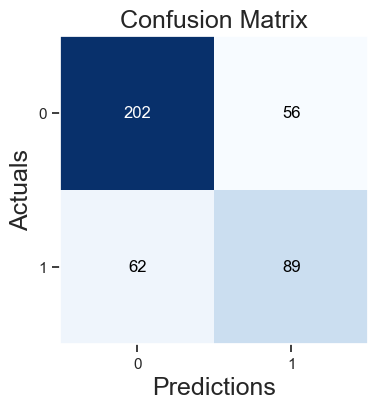

In [93]:
## plot the confusion matrix 

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_NB, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

AUC: 0.686175


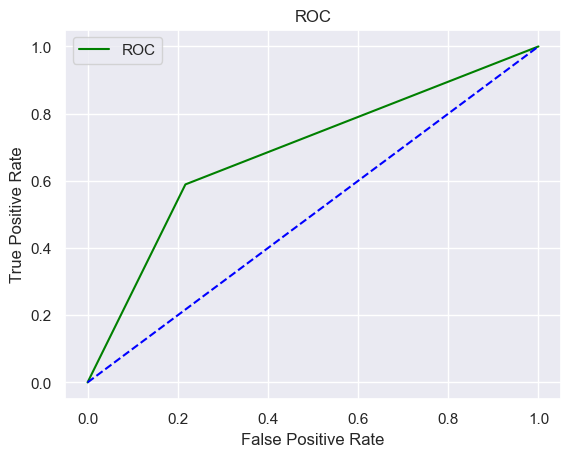

In [94]:
## plot the Area Under the Curver(AUC)

auc_mod_NB= roc_auc_score(Y_test, Y_pred_NB)
print('AUC: %f' %auc_mod_NB)

## grab only 2 values, ignore thresholds

fpr, tpr = roc_curve(Y_test, Y_pred_NB)[0:2]
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [95]:
## apply KNeighbors Classification

KN_news= KNeighborsClassifier(n_neighbors= 5)
KN_model= KN_news.fit(X_train, Y_train)
KN_model

KNeighborsClassifier()

In [97]:
## make prediction
Y_pred_KN= KN_model.predict(X_test)
Y_pred_KN

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [98]:
## check the accuracy

print(classification_report(Y_test, Y_pred_KN))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       258
           1       0.48      0.34      0.40       151

    accuracy                           0.62       409
   macro avg       0.58      0.56      0.56       409
weighted avg       0.60      0.62      0.60       409



In [99]:
## prepare confusion matrix

conf_matrix_KN= confusion_matrix(Y_test, Y_pred_KN)
conf_matrix_KN

array([[202,  56],
       [ 99,  52]])

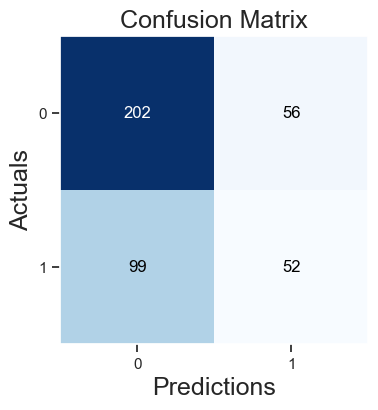

In [100]:
## plot the confusion matrix 

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_KN, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

AUC: 0.563658


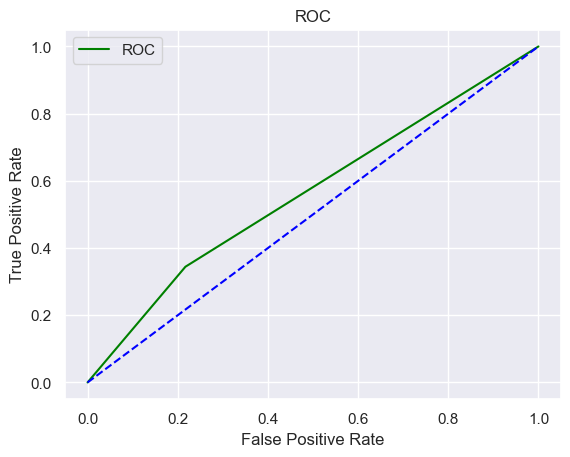

In [101]:
## plot the Area Under the Curver(AUC)

auc_mod_KN= roc_auc_score(Y_test, Y_pred_KN)
print('AUC: %f' %auc_mod_KN)

## grab only 2 values, ignore thresholds

fpr, tpr = roc_curve(Y_test, Y_pred_KN)[0:2]
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [102]:
## apply Random Forest Classification

RF_news= RandomForestClassifier(n_estimators=1000)
RF_model= RF_news.fit(X_train, Y_train)
RF_model 

RandomForestClassifier(n_estimators=1000)

In [103]:
## make prediction
Y_pred_RF= RF_model.predict(X_test)
Y_pred_RF

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [104]:
## ## check the accuracy

print(classification_report(Y_test, Y_pred_RF))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       258
           1       0.80      0.44      0.56       151

    accuracy                           0.75       409
   macro avg       0.77      0.69      0.69       409
weighted avg       0.76      0.75      0.73       409



In [105]:
## prepare confusion matrix

conf_matrix_RF= confusion_matrix(Y_test, Y_pred_RF)
conf_matrix_RF

array([[241,  17],
       [ 85,  66]])

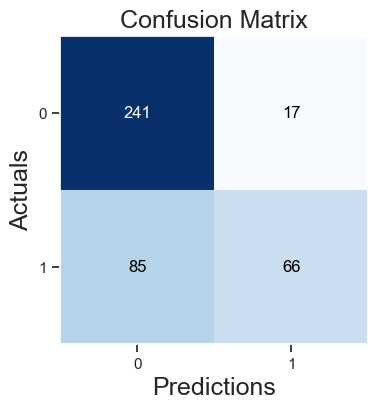

In [106]:
## plot the confusion matrix 

fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_RF, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

AUC: 0.685597


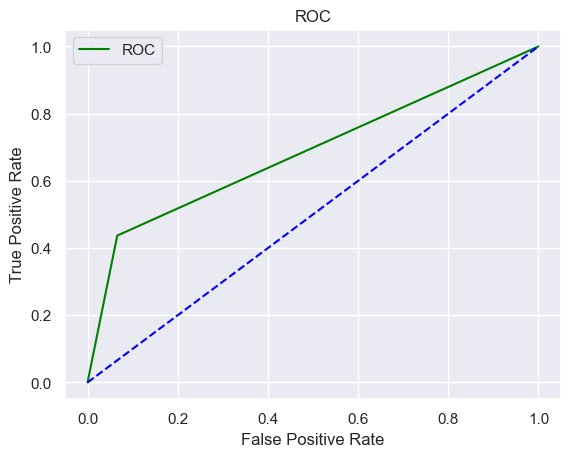

In [107]:
## plot the Area Under the Curver(AUC)

auc_mod_RF= roc_auc_score(Y_test, Y_pred_RF)
print('AUC: %f' %auc_mod_RF)

## grab only 2 values, ignore thresholds

fpr, tpr = roc_curve(Y_test, Y_pred_RF)[0:2]
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [108]:
## apply Linear SVM model 

linear_news_SVM= svm.SVC(kernel='linear')

In [109]:
## train my models 
linear_SVM_model= linear_news_SVM.fit(X_train, Y_train)


In [110]:
# make predictions
Y_pred_SVM= linear_SVM_model.predict(X_test)
Y_pred_SVM

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [111]:
## check the classification report for linear SVM

print(classification_report(Y_test, Y_pred_SVM))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       258
           1       0.57      0.62      0.60       151

    accuracy                           0.69       409
   macro avg       0.67      0.68      0.67       409
weighted avg       0.70      0.69      0.69       409



In [112]:
## let's check confusion matrix for linear SVM 

conf_mat_linear_SVM= confusion_matrix(Y_test, Y_pred_SVM)
conf_mat_linear_SVM

array([[188,  70],
       [ 57,  94]])

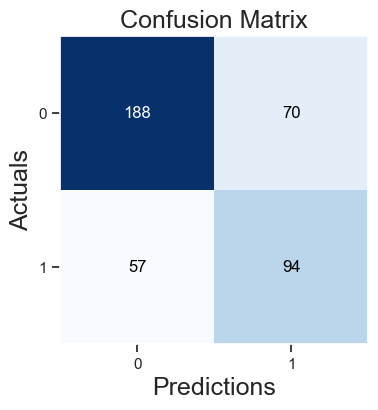

In [113]:
## plot confusion matrix for linear_SVM

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_linear_SVM, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

AUC: 0.675599


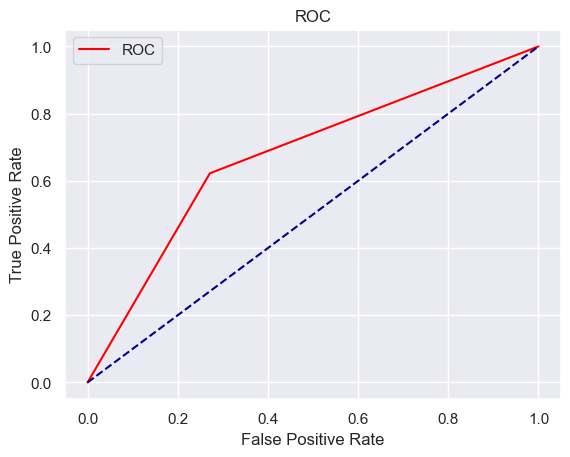

In [114]:
## plot the Area Under the Curver(AUC)

auc_mod_linear_SVM= roc_auc_score(Y_test, Y_pred_SVM)
print('AUC: %f' %auc_mod_linear_SVM)

fpr, tpr = roc_curve(Y_test, Y_pred_SVM)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [115]:
fake_news_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2046
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2044 non-null   object 
 1   published                2044 non-null   object 
 2   title                    2044 non-null   object 
 3   text                     2044 non-null   object 
 4   language                 2044 non-null   object 
 5   site_url                 2044 non-null   object 
 6   main_img_url             2044 non-null   object 
 7   type                     2044 non-null   object 
 8   label                    2044 non-null   object 
 9   title_without_stopwords  2044 non-null   object 
 10  text_without_stopwords   2044 non-null   object 
 11  hasImage                 2044 non-null   float64
 12  text_stem                2044 non-null   object 
 13  main_text                2044 non-null   object 
dtypes: float64(1), object(13

In [ ]:
## apply ANN - with one layer 


In [116]:
## apply early stopping
## this will prevent to overrun the data for unnecessary epochs

early_stopping= callbacks.EarlyStopping(
    min_delta=0.01,
    patience=20,
    restore_best_weights=True)

In [117]:
## create a ANN model
## import libraries as shown at the top

## input layer
## hidden layer
## regularization - to help me stop overfitting
## output layer
## set the variable as model_heart_ML1
## Sequential - input layer to hidden layer to output layer

model_fake_news_ML1= Sequential()

## input layers
## unit is behaving like a neuron, self defined parameter
## keep adjusting the unit parameter to find the best practice, depending on the requirement of the model
## also pay attention to overfitting, do not make it complex
## units=16 for this model but change it later for comparison

## we use kernel_initializer for weight ,it will improve convergence
## activation function - transmitting info - reLU is best used
## Relu will convert all the negatives to 0, will not touch the positives

## so check the dataset - what is the no of columns?
## our dataset is in total 33105
## if I get this wrong, python will tell me the correct one  

model_fake_news_ML1.add(Dense(units= 12, kernel_initializer= 'uniform', activation= 'relu', input_dim= 33105))

## hidden layer
## set hidden layer as the half of the first layer, so use 6 - (1 hidden layer with 8 neurons)

model_fake_news_ML1.add(Dense(units= 6, kernel_initializer= 'uniform', activation= 'relu'))

## set the 2nd hidden layer - couldn't get it work - leave to later
######  model_fake_news_ML1.add(Dense(units= 10, kernel_initializer= 'uniform', activation= 'relu'))

## regularization to prevent overfitting - Dropout
## make sure that my network understands the patterns in my data
## 0.25 = 25% randomly inside my unit will be set to zero, for training
## to make prediction on the test set
## I can change the percentage for dropout but leave it like this for now

model_fake_news_ML1.add(Dropout(0.25))

## set the output layer
## as this is a multi layer classifications, there will be more than two mutually exclusive classes, so the output layer will be set to no of classes and would use Softmax function
##### model_fake_news_ML1.add(Dense(units= 2, kernel_initializer= 'uniform', activation= 'softmax'))

## as my second layer kept giving error - back to 1st layer so change it to binary classification and use sigmoid activation
model_fake_news_ML1.add(Dense(units= 1, kernel_initializer= 'uniform', activation= 'sigmoid'))

## compile the ANN
## optimizer = how the weight is updated
## there are several optimizers - the best use case is 'adam' optimizer is the most effective
## my expectation is that my loss will reduce so that my accuracy will increase
## so minimize the errors
## use 'binary cross entropy' for loss function as this is a binary classification 
## if this was a multi class classificcation, then I would have used 'categorical cross entropy' for loss function

 
model_fake_news_ML1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])


In [118]:
## check the summary
model_fake_news_ML1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                397272    
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 397,357
Trainable params: 397,357
Non-trainable params: 0
_________________________________________________________________


In [143]:

history = model_fake_news_ML1.fit(X_train, Y_train, batch_size=20, epochs=50, callbacks=early_stopping, validation_split=0.20)

Epoch 1/50
66/66 [==============================] - 0s 6ms/step - loss: 0.1676 - accuracy: 0.9549 - val_loss: 0.7777 - val_accuracy: 0.7431
Epoch 2/50
66/66 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.9694 - val_loss: 0.9534 - val_accuracy: 0.6972
Epoch 3/50
66/66 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.9763 - val_loss: 0.8541 - val_accuracy: 0.7523
Epoch 4/50
66/66 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9794 - val_loss: 0.8792 - val_accuracy: 0.7737
Epoch 5/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9809 - val_loss: 1.0955 - val_accuracy: 0.7859
Epoch 6/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9801 - val_loss: 1.2646 - val_accuracy: 0.7034
Epoch 7/50
66/66 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9809 - val_loss: 1.1215 - val_accuracy: 0.7309
Epoch 8/50
66/66 [==

In [ ]:
## I ran the model with several different parameters but still cannot resolve the difference between training accuracy and validation accuracy

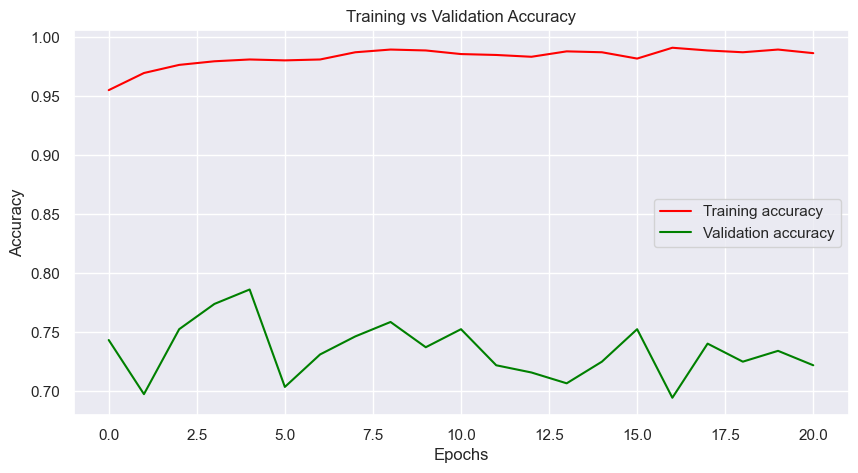

In [144]:
## plot training accuracy vs validation accuracy

history_fake_news= pd.DataFrame(history.history)

plt.figure(figsize=(10,5))
plt.plot(history_fake_news.loc[:, ['accuracy']], color= 'red', label= 'Training accuracy')
plt.plot(history_fake_news.loc[:, ['val_accuracy']], color= 'green', label= 'Validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

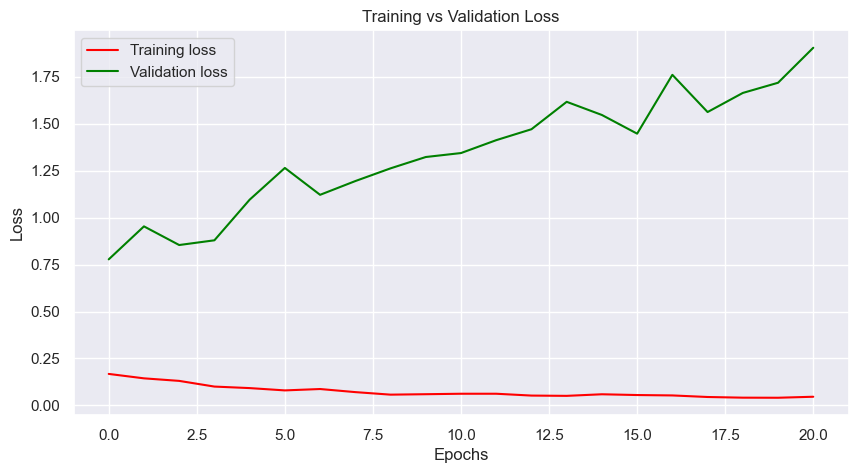

In [145]:
## plot training loss vs validation loss

plt.figure(figsize=(10,5))
plt.plot(history_fake_news.loc[:, ['loss']], color= 'red', label= 'Training loss')
plt.plot(history_fake_news.loc[:, ['val_loss']], color= 'green', label= 'Validation loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
## there is something seriously wrong here...... gaps are too big...

In [146]:
## save my model
## it saves as a folder with that name
model_fake_news_ML1.save('fake_news_ann_model')

INFO:tensorflow:Assets written to: fake_news_ann_model/assets


In [147]:
## load this model
model_news_ANN= tf.keras.models.load_model('fake_news_ann_model') 

In [148]:
## create a prediction
Y_pred_ANN= model_news_ANN.predict(X_test)
Y_pred_ANN

13/13 [==============================] - 0s 3ms/step


array([[9.39547002e-01],
       [3.82540673e-02],
       [2.60044247e-01],
       [4.18927819e-01],
       [4.93828245e-02],
       [9.13446605e-01],
       [4.23505111e-03],
       [4.85064983e-01],
       [4.88445669e-01],
       [3.43089364e-02],
       [1.23462044e-01],
       [8.38764668e-01],
       [6.35871887e-01],
       [2.62479901e-01],
       [3.76426093e-02],
       [8.89299479e-09],
       [9.32860732e-01],
       [3.35881114e-01],
       [9.99934256e-01],
       [4.29381996e-01],
       [4.89647806e-01],
       [4.67061430e-01],
       [2.87670255e-01],
       [9.74201858e-01],
       [4.92189646e-01],
       [9.70100701e-01],
       [1.23652816e-02],
       [9.73393185e-07],
       [8.23575974e-01],
       [5.14042377e-01],
       [5.87378800e-01],
       [6.61440499e-05],
       [3.68535936e-01],
       [1.87817251e-03],
       [7.58990645e-01],
       [1.34056835e-02],
       [4.77401018e-01],
       [7.55390152e-02],
       [3.43050226e-04],
       [1.62609686e-05],


In [149]:
Y_pred_ANN= np.where(Y_pred_ANN >0.5, 1, 0)
Y_pred_ANN

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [150]:
## now that the values are converted with a threshold, I can print the classification report

print(classification_report(Y_test, Y_pred_ANN))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       258
           1       0.73      0.62      0.67       151

    accuracy                           0.78       409
   macro avg       0.76      0.74      0.75       409
weighted avg       0.77      0.78      0.77       409



In [151]:
## calculate the confusion mattix for ANN prediction 

Conf_matrix_ANN = confusion_matrix(Y_test, Y_pred_ANN)
Conf_matrix_ANN

array([[223,  35],
       [ 57,  94]])

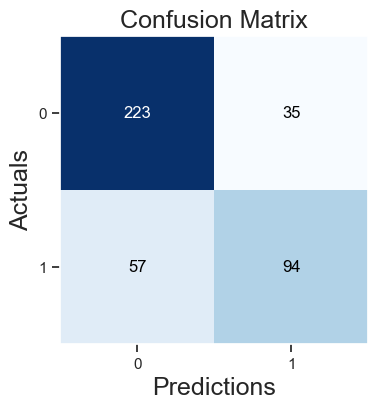

In [152]:
## plot confusion matrix for ANN

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=Conf_matrix_ANN, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

AUC: 0.743429


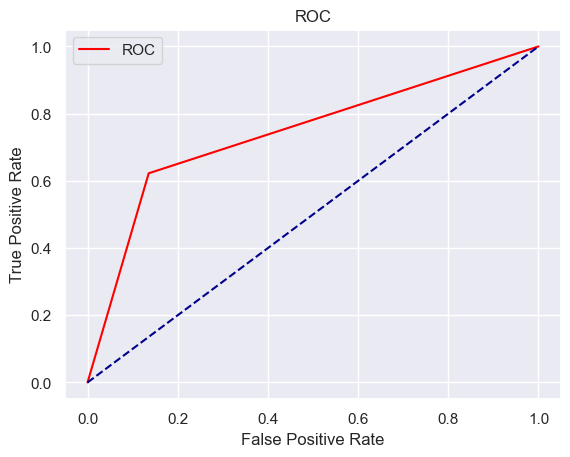

In [153]:
## plot the Area Under the Curver(AUC)

auc_mod_ANN= roc_auc_score(Y_test, Y_pred_ANN)
print('AUC: %f' %auc_mod_ANN)

fpr, tpr = roc_curve(Y_test, Y_pred_ANN)[0:2]
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [ ]:
## I have the highest accuracy of 76% and 0.74 for AUC score for ANN compared to all the other prediction models that I have applied, but this ANN model is not a good fit for prediction due to a big gap between training and validating accuracy.

## Gaussian NB and Linear SVM performed better with accuracies 71% and 69% respectively, both with a better confusion matrix.


